## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

### Load the dataset

In [4]:
df = pd.read_csv(r'D:\elsie\Data Science\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [7]:
categorical_columns = df.select_dtypes(include = 'object').columns
print("The categorical columns are: ", categorical_columns)
numerical_columns = df.select_dtypes(include = 'number').columns
print("The numerical columns are: ", numerical_columns)

The categorical columns are:  Index(['sex', 'smoker', 'day', 'time'], dtype='object')
The numerical columns are:  Index(['total_bill', 'tip', 'size'], dtype='object')


### 2. Compute the average bill amount for each day.

In [9]:
average_bill = df.groupby('day')['total_bill'].mean()
pd.DataFrame(average_bill)

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


### 3. Which gender is more generous in giving tips?

In [11]:
generous_tips = df.groupby('sex')['tip'].mean()
pd.DataFrame(generous_tips)

,tip
sex,
Female,2.833448
Male,3.089618


The most generous gender in givings tips is male

### 4. According to the data, were there more customers for dinner or lunch?

In [14]:
more_customers_for_dinner_or_lunch = df.groupby('time')['time'].count()
pd.DataFrame(more_customers_for_dinner_or_lunch)

,time
time,
Dinner,176
Lunch,68


More no. of customers were there for dinner

### 5. Based on the statistical summary, comment on the variable 'tip'

In [16]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [ ]:
## The minimum amount given as tips is $1
## The maximum amount given as tips is $10
## On a average $2.99 is given as tip
## The 25% and 75% are $2 and $3.56. This shows the range given by maximum no. of people
## There's a possiablity for the presence of outliers since the average is %2.99 and maximum given is $10

### 6. Find the busiest day in terms of the orders?

In [20]:
busiest_day = df['day'].mode()
pd.DataFrame(busiest_day)

,day
0,Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [21]:
df['total_bill'].skew()

1.1332130376158205

Text(0.5, 1.0, 'Skewness of the variable total_bill')

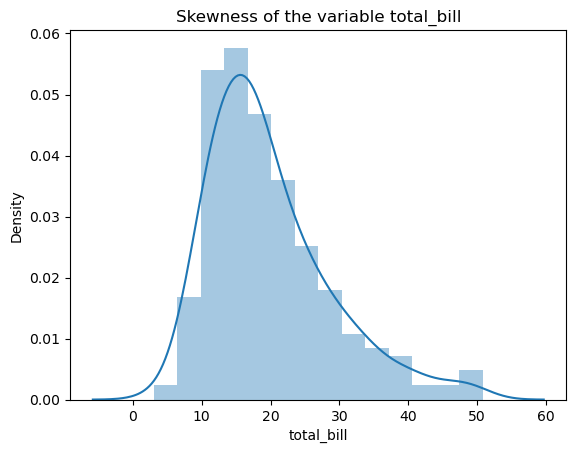

In [23]:
sns.distplot(df['total_bill'])
plt.title('Skewness of the variable total_bill')

In [ ]:
## The variable total bill is postively skewed as it's tails extends right

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [24]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


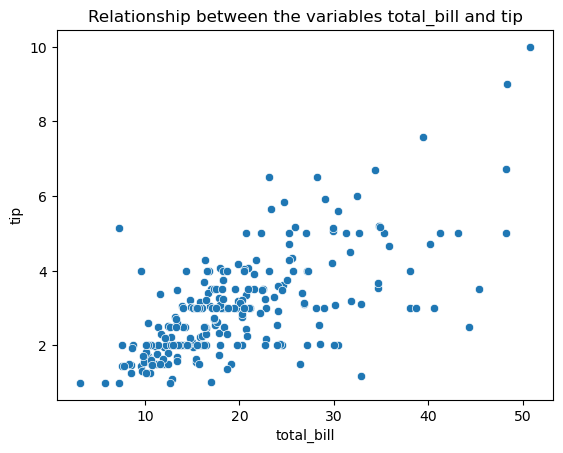

In [25]:
## scatter plot
sns.scatterplot(data = df, x = 'total_bill', y = 'tip')
plt.title("Relationship between the variables total_bill and tip")
plt.show()

In [ ]:
## Yes, the variable tip is dependent on the variable total_bill.
## The tip has positive correlation with the variable total_bill

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [35]:
percentage_of_male_to_female = df['sex'].value_counts(normalize = True)*100
pd.DataFrame(percentage_of_male_to_female)

,proportion
sex,
Male,64.344262
Female,35.655738


([<matplotlib.patches.Wedge at 0x1a762e1d2d0>,
 [Text(-0.574913082982206, 1.1882234415361006, 'Male'),
  Text(0.5749131942317102, -1.1882233877088484, 'Female')],
 [Text(-0.31358895435393047, 0.6481218772015094, '64.34%'),
  Text(0.31358901503547826, -0.64812184784119, '35.66%')])

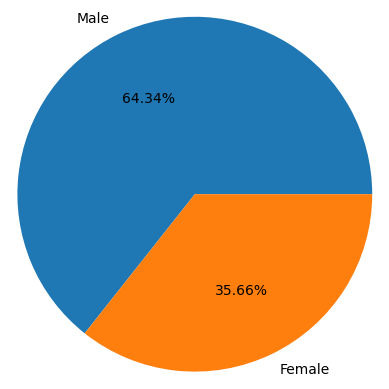

In [41]:
plt.pie( percentage_of_male_to_female, autopct = '%.2f%%', radius = 1.2, labels = ['Male', 'Female'])

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [39]:
genderwise_smoker = df.groupby('sex')['smoker'].value_counts()
pd.DataFrame(genderwise_smoker)

count
sex    smoker       
Female No         54
       Yes        33
Male   No         97
       Yes        60

In [49]:
pd.crosstab(df['smoker'],df['sex'])

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


Text(0, 0.5, 'count')

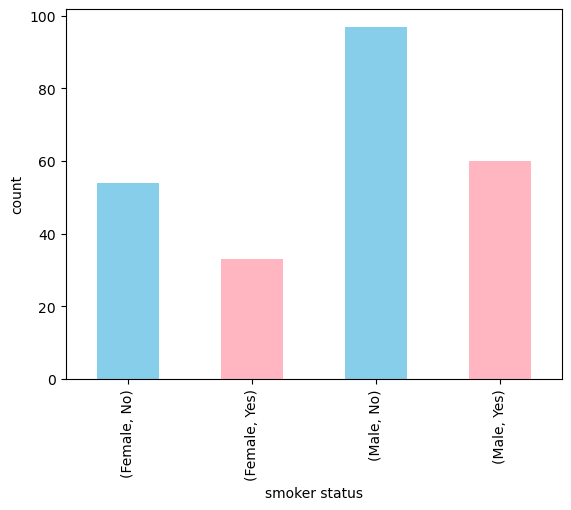

In [55]:
genderwise_smoker.plot(kind = 'bar', color = ['skyblue', 'lightpink'])
plt.xlabel('smoker status')
plt.ylabel('count')

### 11. Compute the average tip amount given for different days and display it in the plot.

Text(0, 0.5, 'Average Tip')

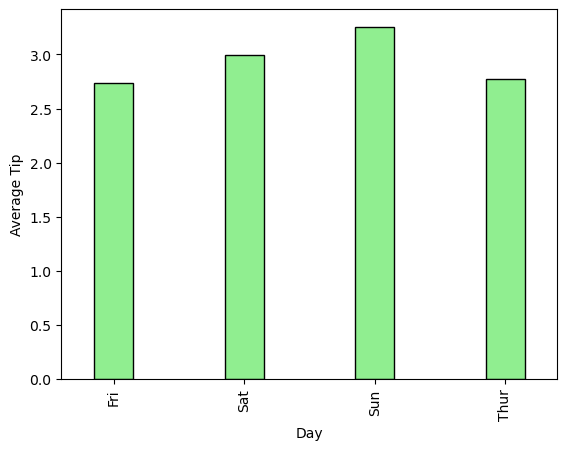

In [67]:
df.groupby('day')['tip'].mean().plot(kind = 'bar', color = 'lightgreen', edgecolor= 'black', width = 0.3)
plt.xlabel('Day')
plt.ylabel('Average Tip')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

Text(0, 0.5, 'Average_Bill')

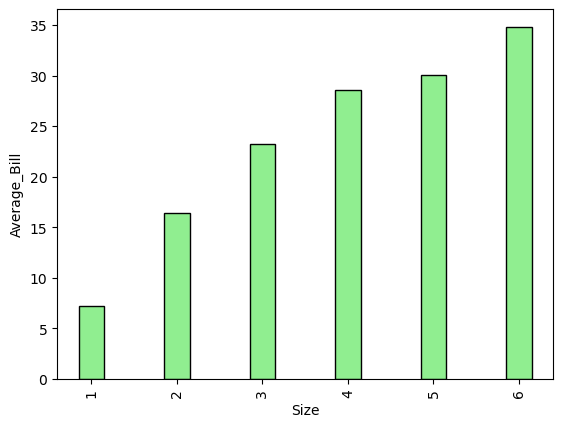

In [9]:
df.groupby('size')['total_bill'].mean().plot(kind = 'bar', color = 'lightgreen', edgecolor = 'black', width = 0.3)
plt.xlabel('Size')
plt.ylabel('Average_Bill')

In [ ]:
## Yes,the variable total_bill is dependent on the variable size 
##As the size of the group increases, the total bill is also increasing
## There's linear dependency between the group size and the bill amount

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

Text(0.5, 1.0, 'Distribution of the variable total_bill based on gender')

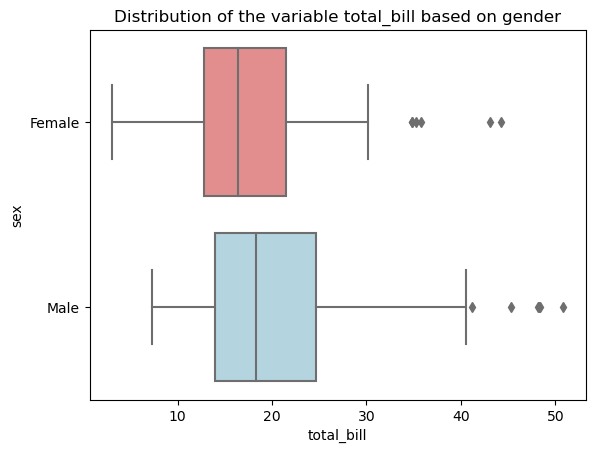

In [12]:
sns.boxplot(data = df, x= 'total_bill', y ='sex', palette={'Male': 'lightblue', 'Female':'lightcoral'})
plt.title('Distribution of the variable total_bill based on gender')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [23]:
df.groupby(['time', 'day'])['total_bill'].max()


time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [ ]:
## The maximum bill amount for dinner on Saturday is $50.81
## The maximum bill amount for dinner on Sunday is $48.17

### 15. Compute the percentage of missing values in the dataset.

In [25]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
## There are no missing values in the dataset

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [29]:
print('No. of duplicated records: ',df.duplicated().sum())
df[df.duplicated()]

No. of duplicated records:  1


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [34]:
df.drop_duplicates(inplace = True)

In [35]:
df.duplicated().sum()

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

Text(0.5, 1.0, 'Outliers Before Transformation Treatment ')

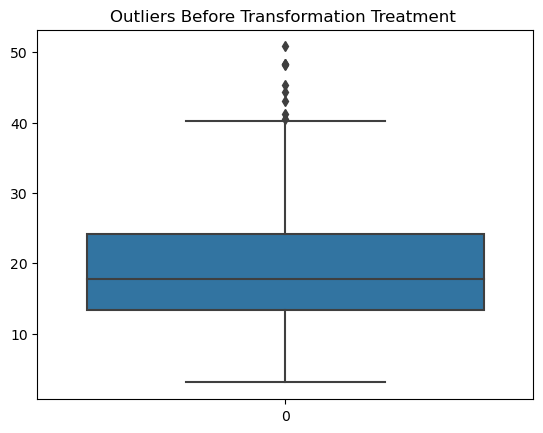

In [40]:
sns.boxplot(df['total_bill'])
plt.title('Outliers Before Transformation Treatment ')

Text(0.5, 1.0, 'Outliers After Transformation Treatment ')

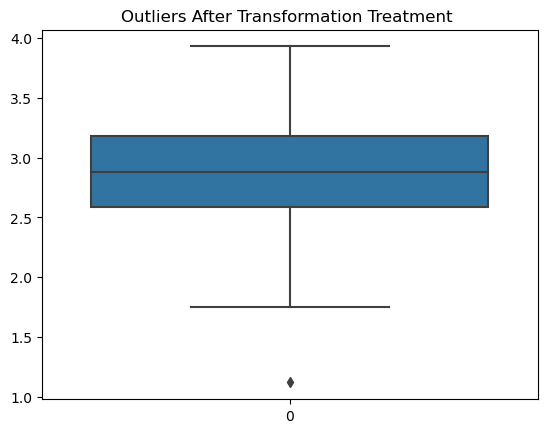

In [41]:
df['new_total_bill'] = np.log(df['total_bill'])
sns.boxplot(df['new_total_bill'])
plt.title('Outliers After Transformation Treatment ')

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

Text(0.5, 1.0, 'Outliers Before IQR Treatment ')

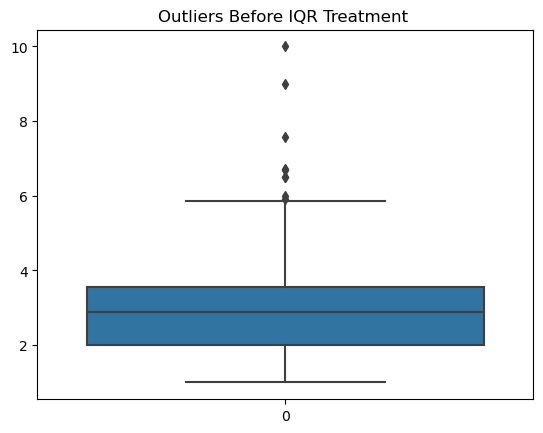

In [42]:
sns.boxplot(df['tip'])
plt.title('Outliers Before IQR Treatment ')

In [44]:
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
IQR = q3-q1
print(IQR)

1.5625


Text(0.5, 1.0, 'Outliers After IQR Treatment ')

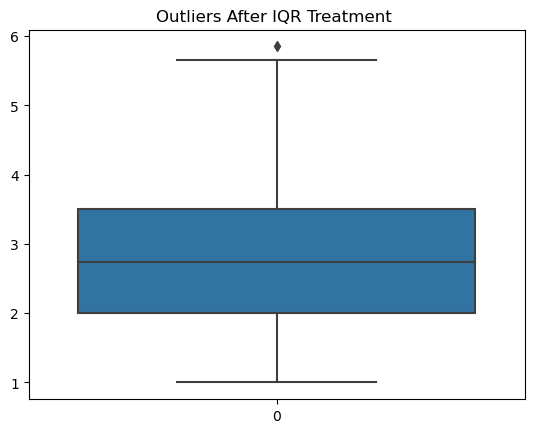

In [45]:
lw = q1-(1.5*IQR)
hw = q3+(1.5*IQR)
new_tip = df.loc[(df['tip']>lw) & (df['tip']<hw)]
sns.boxplot(new_tip['tip'])
plt.title('Outliers After IQR Treatment ')

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [4]:
categorical_columns = df.select_dtypes(include = object)
categorical_columns

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [6]:
df = pd.get_dummies(df)
df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [7]:
maximum = df['total_bill'].max()
minimum = df['total_bill'].min()
Range = maximum - minimum
print("The range of the column total_bill is: ", Range)

The range of the column total_bill is:  47.74


In [10]:
minmax = MinMaxScaler()
df['total_bill_mm'] = minmax.fit_transform(df[['total_bill']])
mm_maximum = df['total_bill_mm'].max()
mm_minimum = df['total_bill_mm'].min()
mm_range = mm_maximum - mm_minimum
print('Transformed Range of column: ', mm_range)

Transformed Range of column:  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [9]:
tips_df = pd.read_csv(r'D:\elsie\Data Science\tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips_df = pd.get_dummies(tips_df)
tips_df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


In [11]:
X = tips_df.drop('tip', axis = 1)
X.head()

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,2,True,False,True,False,False,False,True,False,True,False
1,10.34,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3,False,True,True,False,False,False,True,False,True,False
3,23.68,2,False,True,True,False,False,False,True,False,True,False
4,24.59,4,True,False,True,False,False,False,True,False,True,False


In [12]:
y =tips_df['tip']
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [31]:
minmax = MinMaxScaler()
X_train.iloc[:,:2] = minmax.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = minmax.fit_transform(X_test.iloc[:,:2])

In [32]:
X_train.iloc[:,:2].sample(5)

,total_bill,size
59,0.946795,0.6
200,0.327608,0.4
187,0.573733,0.8
27,0.201508,0.2
89,0.378928,0.2


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [17]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = lm.predict(X_test)
predictions

array([1.84375, 2.375  , 1.90625, 3.625  , 3.625  , 1.5    , 6.5    ,
       2.125  , 0.96875, 1.4375 , 2.875  , 2.375  , 1.46875, 1.875  ,
       1.90625, 2.125  , 2.1875 , 3.09375, 1.875  , 2.5    , 2.09375,
       4.375  , 4.15625, 1.9375 , 4.1875 , 1.4375 , 2.625  , 4.15625,
       5.03125, 3.3125 , 5.875  , 3.9375 , 2.125  , 6.75   , 3.     ,
       2.09375, 2.71875, 1.9375 , 3.3125 , 3.6875 , 4.0625 , 5.09375,
       4.21875, 5.875  , 3.21875, 1.75   , 3.1875 , 4.4375 , 1.5    ,
       2.625  , 3.09375, 2.625  , 2.46875, 3.90625, 4.625  , 2.21875,
       1.9375 , 2.3125 , 2.5    , 3.     , 4.15625, 2.90625, 3.375  ,
       1.5    , 1.75   , 2.9375 , 2.03125, 2.8125 , 2.875  , 3.65625,
       2.3125 , 2.3125 , 2.6875 , 3.5625 ])

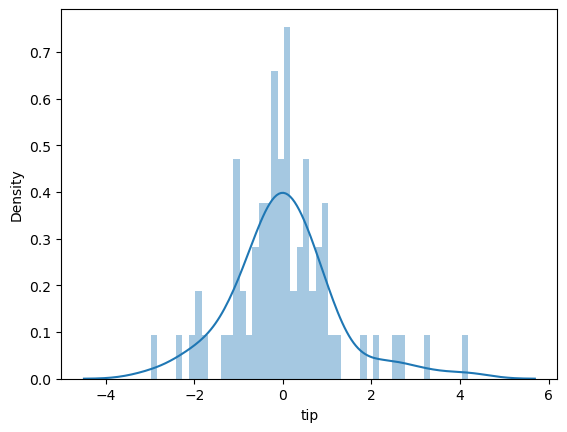

In [22]:
sns.distplot((y_test-predictions),bins=50);

In [23]:
from sklearn import metrics

In [36]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

MAE:  0.8323817567567569
MSE:  1.3972840160472975
RMSE:  1.182067686745263


In [27]:
from sklearn.metrics import r2_score

In [37]:
r2 = r2_score(y_test, predictions)
print('The r_squared value on test-data is: ', r2)

The r_squared value on test-data is:  0.25092359114271856


### Happy Learning:)